# Plotting the topography of Berwick Law

This Notebook is to summarize all the code used to visualize and analyze the topography of Berwick Law.

In [1]:
# Install colour maps
%pip install cmocean

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import all the necessary libraries
import numpy as np

import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import cmocean as cmo

from mpl_toolkits.mplot3d import Axes3D
plt.rcParams["figure.figsize"] = (10,10)

## 25m DTM data
PLotting the contours and elevation of the *unblended* 25dtm Berwick Law data.

In [3]:
# Reading in the data
elevation = np.loadtxt('NorthBerwickLaw.txt')

Text(0, 0.5, 'Direction from origin in northerly direction [m]')

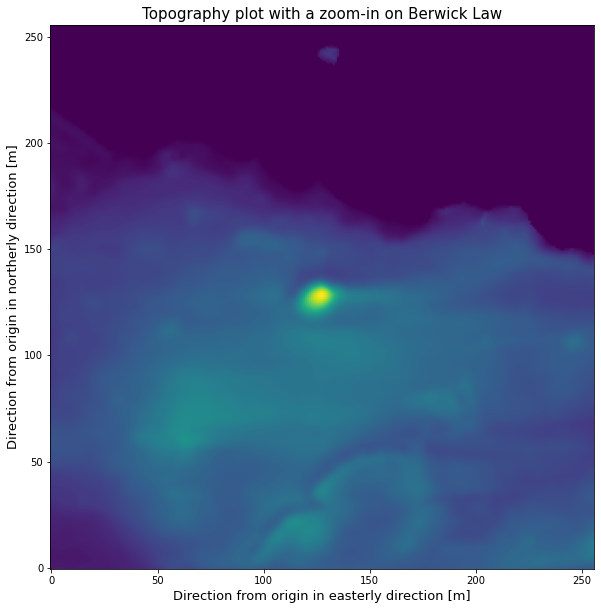

In [4]:
# Need to rotate this first
fig, ax = plt.subplots()
plt.imshow(elevation, origin='lower')
plt.title("Topography plot with a zoom-in on Berwick Law", fontsize = 15)
plt.xlabel("Distance from origin in easterly direction [m]", fontsize = 13)
plt.ylabel("Distance from origin in northerly direction [m]", fontsize = 13)

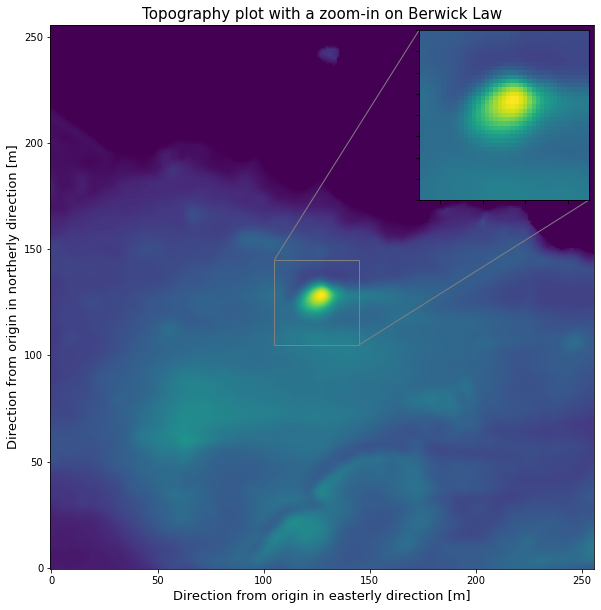

In [5]:
## Make a zoomed in version of the imshow plot
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

fig, ax = plt.subplots()
plt.imshow(elevation, origin='lower')
extent = (105, 145, 105, 145)

# Define position of the zoomed-in plot
axins = zoomed_inset_axes(ax, 2, loc=1)
axins.imshow(elevation)
axins.set_xlim(105, 145)
axins.set_ylim(105, 145)
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

# Set to false, so that x and yticks are not shown
plt.xticks(visible=False)
plt.yticks(visible=False)

# Set the title and axes labels
ax.set_title("Topography plot with a zoom-in on Berwick Law", fontsize = 15)
ax.set_xlabel("Distance from origin in easterly direction [m]", fontsize = 13)
ax.set_ylabel("Distance from origin in northerly direction [m]", fontsize = 13)
plt.draw()

# this plot will be more useful if the resolution of the data is better e.g. for lidar data

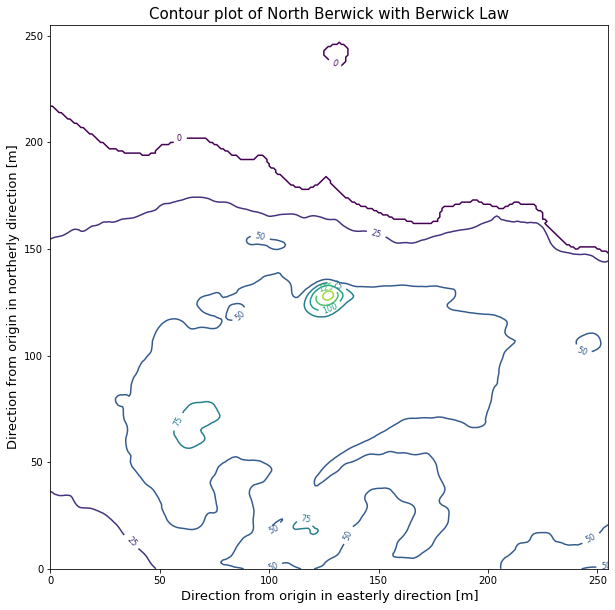

In [6]:
# Contour plot of North Berwick and Berwick Law
fig, ax = plt.subplots()

CS = ax.contour(elevation)

ax.clabel(CS, inline=1, fontsize=8, fmt='%1.f')
ax.set_title('Contour plot of North Berwick with Berwick Law', fontsize = 15)
ax.set_xlabel("Distance from origin in easterly direction [m]", fontsize = 13)
ax.set_ylabel("Distance from origin in northerly direction [m]", fontsize = 13)
plt.show()

Text(0, 0.5, 'Direction from origin in northerly direction [m]')

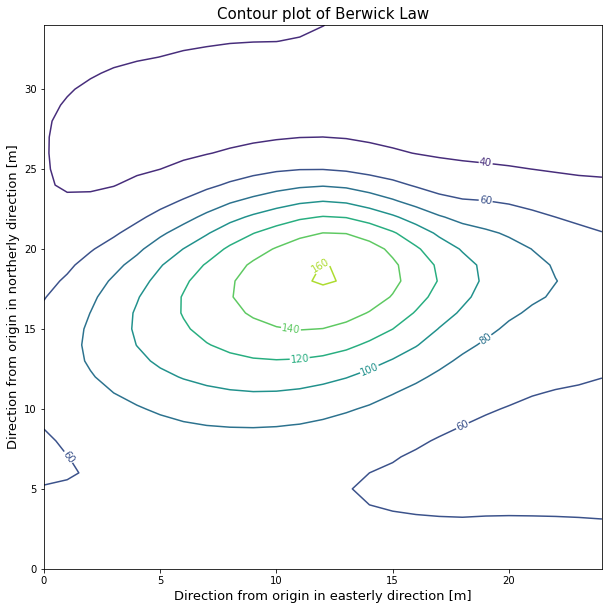

In [7]:
# Contour plot of North Berwick and Berwick Law
# Zoomed in to see more detail
fig, ax = plt.subplots()
CS = ax.contour(elevation[110:145, 115:140])
ax.clabel(CS, inline_spacing = 1, fontsize=10, fmt='%1.f')
ax.set_title("Contour plot of Berwick Law", fontsize = 15)
ax.set_xlabel("Distance from origin in easterly direction [m]", fontsize = 13)
ax.set_ylabel("Distance from origin in northerly direction [m]", fontsize = 13)

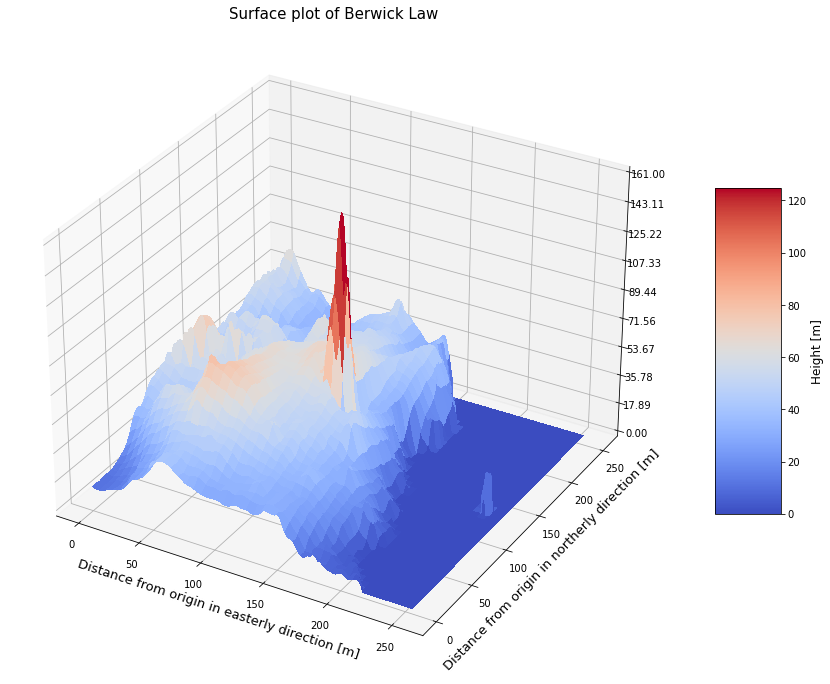

In [18]:
# We will probably not use this plot 

#3d surface
# Define figure and acis
fig = plt.figure(figsize=(20, 12))
ax = fig.gca(projection='3d')

# Define meshgrid and make data
n=len(elevation)
X = np.arange(0, n, 1)
Y = np.arange(0, n, 1)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
B = elevation[X,Y]

# Plot the surface
surf = ax.plot_surface(X, Y, B, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis
ax.set_zlim(0)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_title('Surface plot of Berwick Law', fontsize = 15)
ax.set_xlabel("Distance from origin in easterly direction [m]", fontsize = 13)
ax.set_ylabel("Distance from origin in northerly direction [m]", fontsize = 13)


# Add a color bar which maps values to colors
cbar = fig.colorbar(surf, shrink=0.5, aspect=5)
cbar.ax.set_ylabel('Height [m]', fontsize = 12)
plt.show()

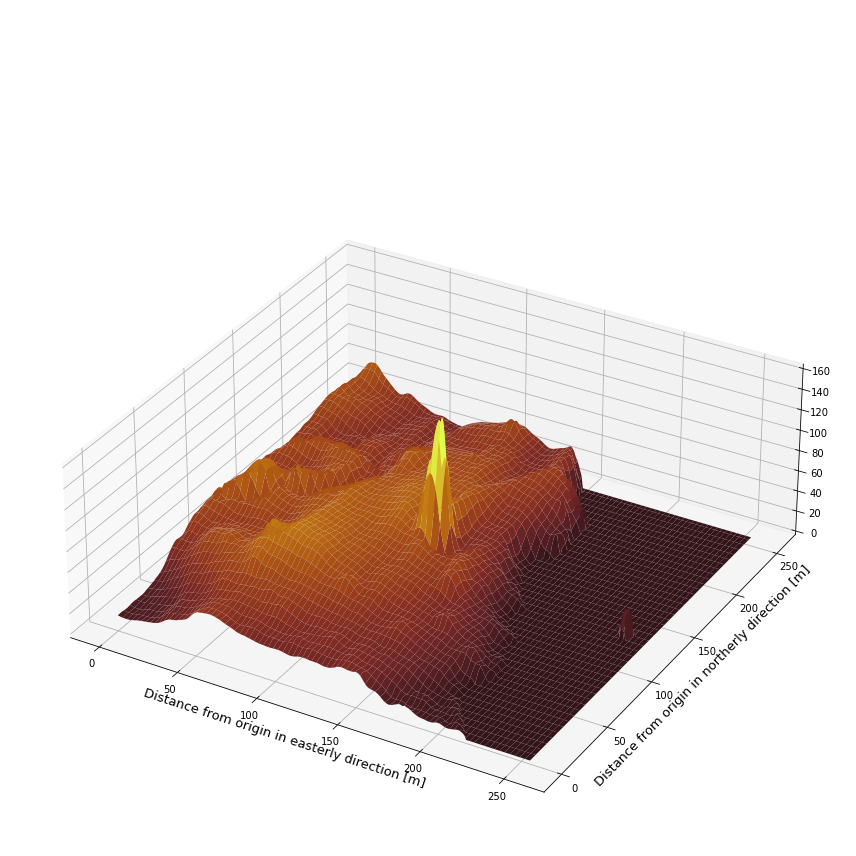

In [37]:
# This plot is more useful 
# Another way of using plot_surface

# Import data
elevation = np.loadtxt('NorthBerwickLaw.txt')
fig = plt.figure(figsize=(20, 12))
ax = fig.gca(projection='3d')


# Scaling of the z-axis to make the plot less spiky and more realistic
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1, 1, 0.5, 1]))

# Define meshgrid and make data
n=len(elevation)
X = np.arange(0, n, 1)
Y = np.arange(0, n, 1)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
B = elevation[X,Y]

# Plot the surface
ax.plot_surface(X, Y, B, cmap= cmo.cm.solar, rcount=50, ccount=100)
#ax.plot_surface(X, Y, B,rcount=50, ccount=100) # without color map
# deep, topo, balance, amp, turbid, solar
# I prefer solar or balance or deep

# Set axes labels
ax.set_xlabel("Distance from origin in easterly direction [m]", fontsize = 13)
ax.set_ylabel("Distance from origin in northerly direction [m]", fontsize = 13)

fig.tight_layout()

## 2m LIDAR data
